In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from operator import add

In [2]:
# Define function to fit and sample from a Multivariate Gaussian

def sample_like(data, n_samples=1000):
	data_mean = data.mean(0)
	data_cov = (data - data_mean).T.dot(data - data_mean) / len(data)
	data_samples = np.random.multivariate_normal(mean=data_mean, cov=data_cov, size=n_samples)
	return data_samples

In [8]:
# Load Real Data

base_url = 'https://marcolorenzi.github.io/material/winter_school/'

df = {
	'demog': pd.read_csv(base_url+'demog.csv'),
	'cognition': pd.read_csv(base_url+'cognition.csv'),
	'volumes': pd.read_csv(base_url+'volumes.csv'),
	'apoe': pd.read_csv(base_url+'apoe.csv'),
	'fluid': pd.read_csv(base_url+'fluid.csv'),	
}

col = {
	'demog': ['SEX', 'AGE', 'PTEDUCAT'],
	'cognition': ['CDRSB.bl', 'ADAS11.bl', 'MMSE.bl', 'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl', 'FAQ.bl'],
	'volumes': ['WholeBrain.bl', 'Ventricles.bl', 'Hippocampus.bl', 'MidTemp.bl', 'Entorhinal.bl'],
	'apoe': ['APOE4'],
	'fluid': ['ABETA.MEDIAN.bl', 'PTAU.MEDIAN.bl', 'TAU.MEDIAN.bl'],
}

all_cols = reduce(add, col.values())

tmp_data = []
for df_, col_ in zip(df.values(), col.values()):
	tmp_data.append(df_[col_].values)

data = np.concatenate(tmp_data, axis=1)
real_adni = pd.DataFrame(data, columns=all_cols)

data_samples = sample_like(data)
pseudo_adni = pd.DataFrame(data_samples, columns=all_cols)

## Modeling integer constrained values

MMSE is an integer valued cognition indicator which is constrained in the range 0-30.

Modeling it with as a real unconstrained value is an approximation.

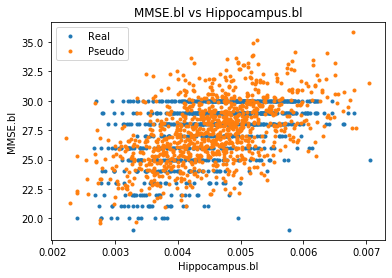

In [13]:
# Plot

xcol = 'Hippocampus.bl'
ycol = 'MMSE.bl'

plt.figure()
plt.title(f'{ycol} vs {xcol}')
plt.plot(real_adni[xcol], real_adni[ycol], '.')
plt.plot(pseudo_adni[xcol], pseudo_adni[ycol], '.')
plt.ylabel(ycol)
plt.xlabel(xcol)
plt.legend(['Real', 'Pseudo'])

In [ ]:
# Save Data
pseudo_adni.to_csv('pseudo_adni.csv', index=False)

print("See you!")